<h1> <center> <h1> Titanic: Machine Learning from Disaster </h1></center></h1>

<h5> Competition Description </h5> 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)

I tried to explian the feature engineering parts, applied different models inlcuding ensemble modeling for a higher accuracey. While adding new features increse the triang accuracy ~94%, it reduces the accuracy on the test data set(test accuracy ~82%). 

The trick of adding a feature 'WomanOrBoySurvived' by https://www.kaggle.com/mauricef/titanic and with  only three features helps to increase the test accuracy ~83%. I found https://www.kaggle.com/mauricef/titanic this Kernal very useful. 


This Kernel will be very helpful for the beginner. If you like this Kernerl Please give an upvote, which keeps me motivated. 


<h5> Let's get started </h5>

Let's import the libraries

In [54]:
# Common imports
import pandas as pd
import numpy as np
import os

# To plot Pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

#Modelling and others
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import cluster, datasets, mixture
from sklearn.metrics import accuracy_score,recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rc('axes', labelsize= 15)
mpl.rc('xtick', labelsize= 12)
mpl.rc('ytick', labelsize= 12)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# avoid warnings
import warnings
warnings.filterwarnings(action="ignore")

Let's import the data

In [55]:
train = pd.read_csv (r'C:\Users\Mizanur Rahman\Desktop\Kaggle Competitions\Machine Learning from Disaster\titanic\train.csv')
test = pd.read_csv (r'C:\Users\Mizanur Rahman\Desktop\Kaggle Competitions\Machine Learning from Disaster\titanic\test.csv')


Let's set PassengerId as the Index. 

In [56]:
train=train.set_index('PassengerId')
test=test.set_index('PassengerId')

<h3> Exploratory Data Analysis (EDA) </h3>

Let's take a quick look at the top 5 rows of the training data using the DataFrame's head() method

In [57]:
train .head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# See the name of the columns
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The info() method is useful to get a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number
of nonnull values

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 891 instances in the dataset

Let's seperate the numeric and categorical columns

In [60]:
print("Numeric columns: \n", train.select_dtypes(include='number').columns)

print("Categorical columns: \n", train.select_dtypes(include='object').columns)

Numeric columns: 
 Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: 
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Let's look at the other values. The describe() method shows a summary of the numnerical attributes.

In [61]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Another quick way to get a feel of the type of data is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

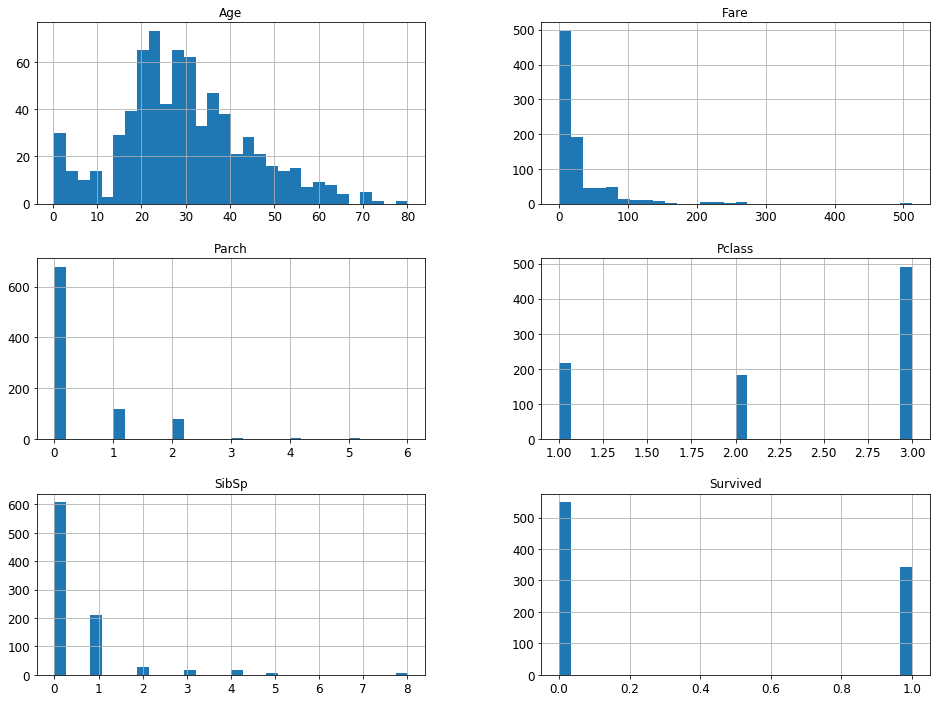

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=30, figsize=(16,12))
#save_fig("attribute_histogram_plots")
plt.show()

<h5> The target variable: Survived </h5>

Let's analyze our target variable. 

In [67]:
#check the percentage of the passenger survived and not survived on the training dataset
Passenger_notsurvived =  (train['Survived'].value_counts()[0] / len(train['Survived']) ) * 100 
Passenge_Survived = 100 - Passenger_notsurvived
print("Passenge Survived : {:.2f}% , Passenge not Survived : {:.2f}%".format(Passenge_Survived,Passenger_notsurvived))

Passenge Survived : 38.38% , Passenge not Survived : 61.62%


Let's visualize the data to gain into further insight

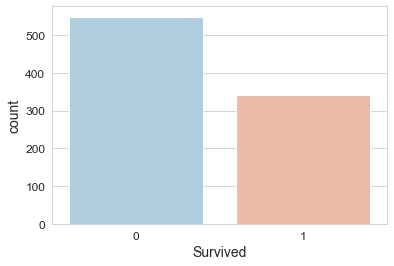

In [69]:
# use seaborn
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

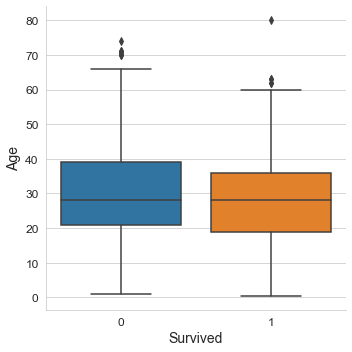

In [70]:
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="box")

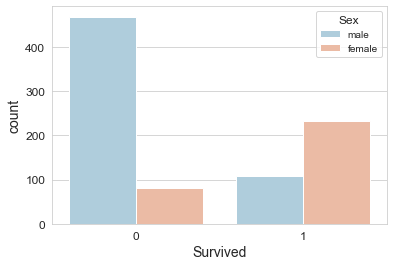

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Observations:
    1. The survival rate for male was low compared to a high survival rate of the female.

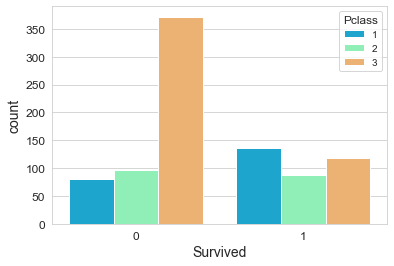

In [72]:
#more checks
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Observations:Class 1 Passenger has very high survival rate compared the the class 3. 
    Let's wrtie a function and compared the survival rate.

Let's compare the surviavl rates as a function of Age, Pclass, and SibSp

In [73]:
def comparevariables(train,var1, var2):
    print(train[[var1, var2]][train[var2].isnull()==False].groupby([var1], as_index=False).mean().sort_values(by=var2, ascending=False))

In [74]:
comparevariables(train,'Age','Survived')

      Age  Survived
0    0.42       1.0
9    5.00       1.0
79  63.00       1.0
68  53.00       1.0
1    0.67       1.0
..    ...       ...
37  28.50       0.0
49  36.50       0.0
46  34.50       0.0
26  20.50       0.0
30  23.50       0.0

[88 rows x 2 columns]


In [75]:
comparevariables(train,'Pclass','Survived')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [76]:
comparevariables(train,'SibSp','Survived')

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


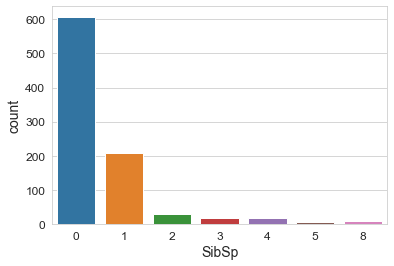

In [77]:
#Let's plot fe more
sns.countplot(x='SibSp',data=train)

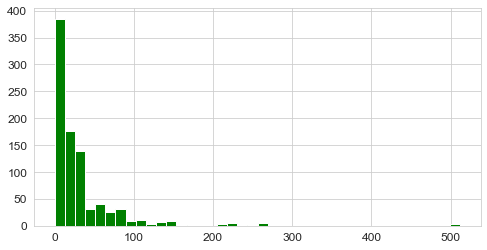

In [78]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [79]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

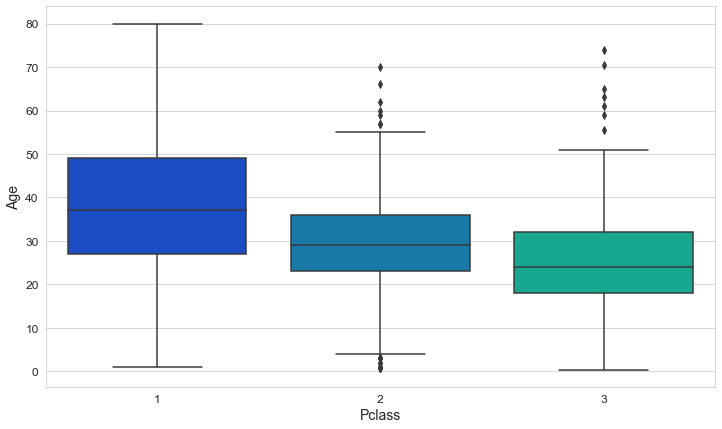

In [80]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<h3> Prepare the Data for Machine Learning Algorithms </h3>

In [81]:
# Combine train and test features
df = pd.concat([train, test], axis=0, sort=False)
df.shape

(1309, 11)

In [82]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h5> Data Cleaning </h5>

In [83]:
#first check the missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


There are 1014 missing cabins, and 263 missing ages.We cand drop the Cabin columns as more than 77% instances are missing. 

Text(0, 0.5, 'Percent of missing values')

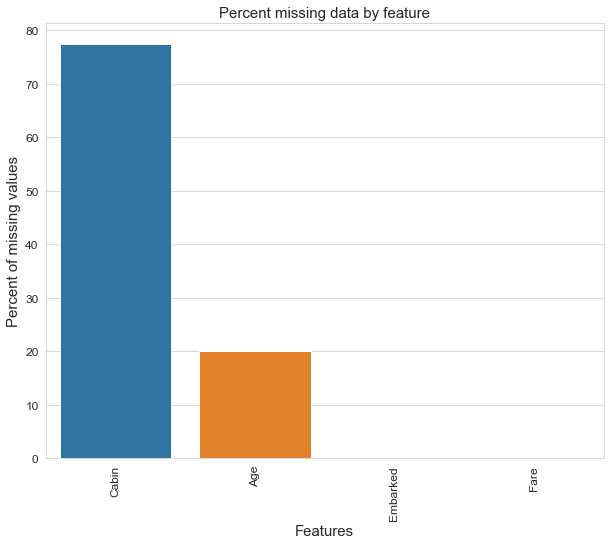

In [84]:
# Visualize missing values
missing_data=missing_data.head(5).drop('Survived')
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.title('Percent missing data by feature', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

<h5> Imputing missing values </h5>

Filling missing value of age

In [85]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [86]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

In [87]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Sir               1
Don               1
Dona              1
Mme               1
the Countess      1
Jonkheer          1
Lady              1
Capt              1
Name: Title, dtype: int64

In [89]:
df['Age'] = df.groupby([ 'Title'])['Age'].apply(lambda x: x.fillna(x.median()))

Filling other missing values

In [90]:
median_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df['Fare'] = df['Fare'].fillna(median_fare)

In [91]:
em_mode = df[df['Pclass']==1]['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(em_mode)

<h5> Create new features </h5>

In [93]:
# Thanks to https://www.kaggle.com/mauricef/titanic for these amazing features
df['IsWomanOrBoy'] = ((df.Title == 'Master') | (df.Sex == 'female'))
df['LastName'] = df.Name.str.split(',').str[0]
family = df.groupby(df.LastName).Survived
df['WomanOrBoyCount'] = family.transform(lambda s: s[df.IsWomanOrBoy].fillna(0).count())
df['WomanOrBoyCount'] = df.mask(df.IsWomanOrBoy, df.WomanOrBoyCount - 1, axis=0)
df['FamilySurvivedCount'] = family.transform(lambda s: s[df.IsWomanOrBoy].fillna(0).sum())
df['FamilySurvivedCount'] = df.mask(df.IsWomanOrBoy, df.FamilySurvivedCount - df.Survived.fillna(0), axis=0)
df['WomanOrBoySurvived'] = df.FamilySurvivedCount / df.WomanOrBoyCount.replace(0, np.nan)
df['Alone'] = (df.WomanOrBoyCount == 0)

In [94]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'IsWomanOrBoy', 'LastName',
       'WomanOrBoyCount', 'FamilySurvivedCount', 'WomanOrBoySurvived',
       'Alone'],
      dtype='object')

Consider only 'Sex', 'WomanOrBoySurvived', 'Alone','Age' and 'Fare' columns to avoid overfitting the training data whcih have high correlation with our target variable.

In [95]:
df=df[['Sex', 'WomanOrBoySurvived', 'Alone','Age','Fare']]

In [96]:
df.isna().sum()

Sex                     0
WomanOrBoySurvived    960
Alone                   0
Age                     0
Fare                    0
dtype: int64

In [97]:
#Check the info one more time
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 5 columns):
Sex                   1309 non-null object
WomanOrBoySurvived    349 non-null object
Alone                 1309 non-null bool
Age                   1309 non-null float64
Fare                  1309 non-null float64
dtypes: bool(1), float64(2), object(2)
memory usage: 92.4+ KB


In [98]:
#fill the non null value with 0 and replcae sex columns
df['WomanOrBoySurvived']=df['WomanOrBoySurvived'].fillna(0)
df['Sex']=df['Sex'].replace({'male': 0, 'female': 1})

In [99]:
#Check for the last time 
df.isna().sum()

Sex                   0
WomanOrBoySurvived    0
Alone                 0
Age                   0
Fare                  0
dtype: int64

In [100]:
df.head()

,Sex,WomanOrBoySurvived,Alone,Age,Fare
PassengerId,,,,,
1,0,0.0,True,22.0,7.2500
2,1,0.0,True,38.0,71.2833
3,1,0.0,True,26.0,7.9250
4,1,0.0,True,35.0,53.1000
5,0,0.0,True,35.0,8.0500


<h5> Create Test Train Features </h5>

In [101]:
# Split features and labels
y = train['Survived'].reset_index(drop=True)
train = df[:len(train)]
test = df[len(train):]
train.shape,test.shape

((891, 5), (418, 5))

### Modelling

<h5> Setup cross validation </h5>

<h5>Define Scores </h5>

In [102]:
Scores = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

In [104]:
#Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(train, y,test_size=0.20, random_state=42)

<h5>Models </h5>

<h5> XGBClassifier </h5>

In [105]:
xgboost = XGBClassifier(learning_rate=0.01, n_estimators=4060,gamma=0.0482,
                                     max_depth=4, min_child_weight=0,
                                     subsample=0.7,colsample_bytree=0.7,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006,random_state=42)

xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)

score = pd.DataFrame({"Model":['XGBClassifier'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

<h5> RandomForestClassifier </h5>

In [107]:
RFmodel = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 3000]}, cv=10).fit(X_train,y_train)
RFmodel.fit(X_train,y_train)
y_pred = RFmodel.predict(X_test)

score = pd.DataFrame({"Model":['RFmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

<h5> DecisionTreeClassifier <h5>

In [109]:
DTmodel = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'max_depth' : np.arange(2, 9, dtype=int),
              'min_samples_leaf' :  np.arange(1, 3, dtype=int)}, cv=10).fit(X_train,y_train)
DTmodel.fit(X_train,y_train)
y_pred = DTmodel.predict(X_test)

score = pd.DataFrame({"Model":['DTmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

<h5> KNeighborsClassifier </h5>

In [110]:
KNmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 10]}, cv=10).fit(X_train,y_train)

KNmodel.fit(X_train,y_train)
y_pred = KNmodel.predict(X_test)

score = pd.DataFrame({"Model":['KNmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

<h5> LogisticRegression </h5>

In [111]:
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

y_pred = logmodel.predict(X_test)

score = pd.DataFrame({"Model":['logmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

<h5> Suppport vector classiffier </h5>

In [112]:
SVCmodel= SVC(probability=True)
SVCmodel.fit(X_train,y_train)

y_pred = SVCmodel.predict(X_test)

score = pd.DataFrame({"Model":['SVCmodel'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)

<h5> Ensemble modelling </h5>

In [114]:
vot_classifier = VotingClassifier(estimators=[('xg', xgboost),('log', logmodel), ('rf', RFmodel), ('dt', DTmodel), ('svc', SVCmodel)], voting='soft', n_jobs=4)

vot_classifier=vot_classifier.fit(X_train, y_train)

y_pred = vot_classifier.predict(X_test)

score = pd.DataFrame({"Model":['vot_classifier'],
                    "Accuracy Score": [accuracy_score(y_test, y_pred)],
                   "Recall": [recall_score(y_test, y_pred)],
                   "F1score": [f1_score(y_test, y_pred)]})
Scores = Scores.append(score)
vot_classifier=vot_classifier.fit(train, y)

In [115]:
Scores

,Model,Accuracy Score,Recall,F1score
0,XGBClassifier,0.932961,0.959459,0.922078
0,RFmodel,0.910615,0.932432,0.896104
0,DTmodel,0.916201,0.918919,0.900662
0,KNmodel,0.731844,0.513514,0.612903
0,logmodel,0.893855,0.972973,0.883436
0,SVCmodel,0.748603,0.648649,0.680851
0,vot_classifier,0.921788,0.945946,0.909091


Although these models give a high training accuracy of 93%, the accuracy on the competition test set is ~82% which is top 5% submission on the leaderboard.

The trick of https://www.kaggle.com/mauricef/titanic using only three features 'Sex', 'WomanOrBoySurvived', 'Alone' gives a high accuracy ~ 83% on the training test using a
    the same DecisionTreeClassifier which is top 2% on the leaderboard.

Let's try to using only these three features 

In [116]:
df1=df[['Sex', 'WomanOrBoySurvived', 'Alone']]

In [118]:
# Split features and labels
y=y
train = df1[:len(train)]
test = df1[len(train):]
train.shape,test.shape

((891, 3), (418, 3))

In [119]:
DTmodel.fit(train,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2])},
      

<h3> Predictions and Submission </h3>

In [120]:
submission = pd.read_csv (r'C:\Users\Mizanur Rahman\Desktop\Kaggle Competitions\Machine Learning from Disaster\titanic\gender_submission.csv')


In [121]:
submission.iloc[:,1] = DTmodel.predict(test).astype(int)

In [122]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [123]:
submission.to_csv("submissionTitanic.csv", index=False)

<h5> Thank you very much </h5>

Please let me know if you think that this Kernel can be further improved or if you find find an error. 
A few upvotes would by highly appreciated. 
   